# MNIST Image Classification

In [1]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import apply_channel_shift

# Load Dataset

In [2]:
# Load the MNIST dataset
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()

# Display dataset dimensions
print('Training data shape:',X_train.shape)
print('Training labels shape:',y_train.shape)
print('Test data shape:',X_test.shape)
print('Test label shape:',y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test label shape: (10000,)


In [3]:
# Display Dataset Datatypes
print('Training variables Datatype:',X_test.dtype)
print('Training labels Datatype:',X_test.dtype)
print('Test variables Datatype:',X_test.dtype)
print('Test labels Datatype:',X_test.dtype)

Training variables Datatype: uint8
Training labels Datatype: uint8
Test variables Datatype: uint8
Test labels Datatype: uint8


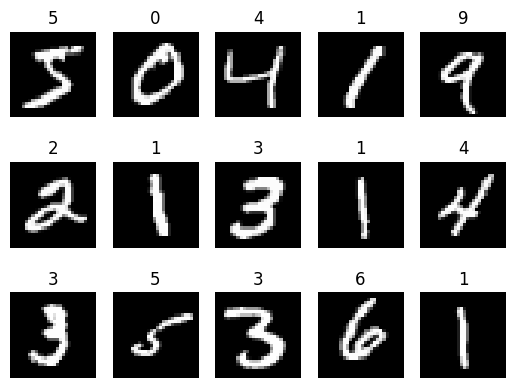

In [4]:
# Visualize a subset of the MNIST dataset
for i in range(15):
    # Create a subplot grid with 3 rows and 5 columns
    plt.subplot(3, 5, i + 1)

    # Display the image from the training set
    plt.imshow(X_train[i], cmap='gray')

    # Set the title as the corresponding label
    plt.title(y_train[i])

    # Disable the axis labels for cleaner visualization
    plt.axis('off')

# Show the plot
plt.show()

# Data Preprocessing

We'll use the following techniques for preprocessing :



*   Grayscale conversion
*   Normalisation
*   Data Augmentation
*   Image standardization

[Module: tf.keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image)



In [5]:
# Apply shift to training images
X_train_shift = apply_channel_shift(X_train,50,channel_axis=0)
X_train_shift.shape


(60000, 28, 28)

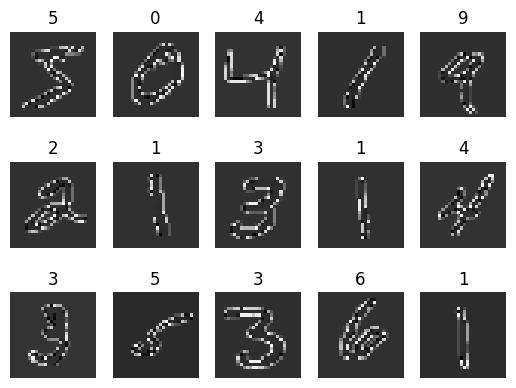

In [6]:
# Visualize a subset of the MNIST dataset
for i in range(15):
    # Create a subplot grid with 3 rows and 5 columns
    plt.subplot(3, 5, i + 1)

    # Display the image from the training set
    plt.imshow(X_train_shift[i], cmap='gray')

    # Set the title as the corresponding label
    plt.title(y_train[i])

    # Disable the axis labels for cleaner visualization
    plt.axis('off')

# Show the plot
plt.show()

In [7]:
X_train_rotate = tf.keras.preprocessing.image.random_rotation(X_train,120)

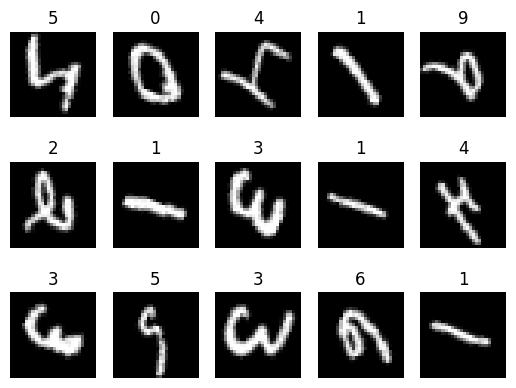

In [8]:
# Visualize a subset of the MNIST dataset
for i in range(15):
    # Create a subplot grid with 3 rows and 5 columns
    plt.subplot(3, 5, i + 1)

    # Display the image from the training set
    plt.imshow(X_train_rotate[i], cmap='gray')

    # Set the title as the corresponding label
    plt.title(y_train[i])

    # Disable the axis labels for cleaner visualization
    plt.axis('off')

In [9]:
print('X_train data shape:',X_train.shape)
print('X_train_shift data shape:',X_train_shift.shape)
print('X_train_rotate data shape:',X_train_rotate.shape)

X_train = tf.concat([X_train,X_train_shift,X_train_rotate,],axis=0)
print('Training data shape:',X_train.shape)


X_train data shape: (60000, 28, 28)
X_train_shift data shape: (60000, 28, 28)
X_train_rotate data shape: (60000, 28, 28)
Training data shape: (180000, 28, 28)


In [10]:
# Join y_train 
y_train = np.concatenate((y_train,y_train,y_train))
print('Training labels shape:',y_train.shape)

Training labels shape: (180000,)


# Modeling

In [11]:
input_shape = (28,28,1)
inputs = tf.keras.Input(shape=input_shape) 

In [12]:
# Add the convolutional layers
conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1)
maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

# Flatten the feature maps
flatten = tf.keras.layers.Flatten()(maxpool2)

# Add the fully connected layers
dense1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
output = tf.keras.layers.Dense(10, activation='softmax')(dense1)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0     

In [18]:
history = model.fit(X_train, y_train, batch_size= 32,epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
4500/4500 [==============================] - 186s 41ms/step - loss: 0.1313 - accuracy: 0.9593 - val_loss: 0.1488 - val_accuracy: 0.9580
Epoch 2/5
4500/4500 [==============================] - 187s 42ms/step - loss: 0.0918 - accuracy: 0.9716 - val_loss: 0.1094 - val_accuracy: 0.9676
Epoch 3/5
4500/4500 [==============================] - 177s 39ms/step - loss: 0.0720 - accuracy: 0.9779 - val_loss: 0.1000 - val_accuracy: 0.9715
Epoch 4/5
4500/4500 [==============================] - 172s 38ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.1068 - val_accuracy: 0.9742
Epoch 5/5
4500/4500 [==============================] - 186s 41ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.1051 - val_accuracy: 0.9771


In [15]:
# Evaluate the model on the testing dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))
print('Loss:' ,loss)

313/313 [==============================] - 5s 13ms/step - loss: 0.1006 - accuracy: 0.9696
Accuracy: 96.96%
Loss: 0.10056167840957642
